<div style="background-color: #00FF00; padding: 20px;">
    <p style='text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:black;
              font-size:50px;
              margin: 5px;'> 
        <font color='blue'; size='7'>Price Forecasting</font>
    </p>
    <p style="text-align:center;
              font-family: sans-serif;
              font-weight:bold;
              color:tomato;
              font-size:40px;
              margin: 10px;">
        PROPHET   Model
    </p>
</div>

<h1 style="text-align: center; color: WHITE; font-size:30px; background-color: #00FF00; padding: 10px; border-radius: 5px;">
    Project Workflow
</h1>


### 1. Get Data:

### 2. Load your time series data.
   - Prepare Data for Prophet with Log Transformation:

### 3. Apply log transformation to stabilize variance and prepare the data for Prophet.
   - Plot the Data (After Log Transformation):

### 4. Visualize the log-transformed data to understand its characteristics.
   - Split the Data into Training and Testing Sets:

### 5. Divide the data into training and testing sets for model evaluation.
   - Build and Fit the Prophet Model:

### 6. Create a Prophet model and fit it to the training data.
   - Make Predictions:

### 7. Generate forecasts using the fitted Prophet model.
   - Plot the Forecast:

### 8. Visualize the forecasted values along with the historical data.
   - Evaluate Forecast Accuracy:

### 9. Assess the accuracy of your forecasts using appropriate metrics.
   - Plot Actual vs Forecast:

### 10. Compare actual values against forecasted values to evaluate model performance.
   - Evaluate Forecast Accuracy:

### 11. Reassess the accuracy of your forecasts with additional metrics if necessary.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Get Data
file_path = 'zinc_prices_IMF.csv'  # Replace with your file path
zinc_prices = pd.read_csv(file_path)

# Step 2: Prepare Data for Prophet with Log Transformation
zinc_prices['Date'] = pd.to_datetime(zinc_prices['Date'])
zinc_prices.rename(columns={'Date': 'ds', 'Price': 'y'}, inplace=True)

# Apply log transformation to stabilize variance
zinc_prices['y'] = np.log(zinc_prices['y'])

# Step 3: Plot the data (after log transformation)
plt.figure(figsize=(10, 6))
plt.plot(zinc_prices['ds'], zinc_prices['y'], label='Zinc Prices (Log Transformed)')
plt.title('Zinc Prices Over Time (Log Transformed)')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.show()

In [ ]:
# Step 4: Split the data into training and testing sets
train_size = int(len(zinc_prices) * 0.8)
train, test = zinc_prices[:train_size], zinc_prices[train_size:]

# Step 5: Build and Fit the Prophet Model
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(train)

In [ ]:
# Step 6: Make Predictions
future = model.make_future_dataframe(periods=len(test), freq='MS')
forecast = model.predict(future)

# Inverse log transformation to bring predictions back to original scale
forecast['yhat'] = np.exp(forecast['yhat'])

# Step 7: Plot the forecast
plt.figure(figsize=(10, 6))
model.plot(forecast)
plt.title('Prophet Forecast (with Log Transformation)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_5272\2753264756.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  zinc_prices['Date'] = pd.to_datetime(zinc_prices['Date'])


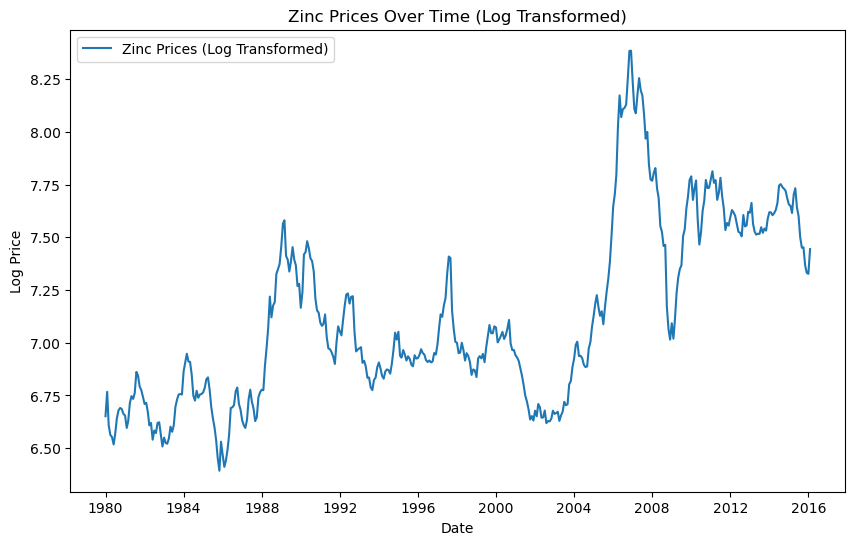

15:10:42 - cmdstanpy - INFO - Chain [1] start processing
15:10:42 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\USER\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\USER\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


<Figure size 1000x600 with 0 Axes>

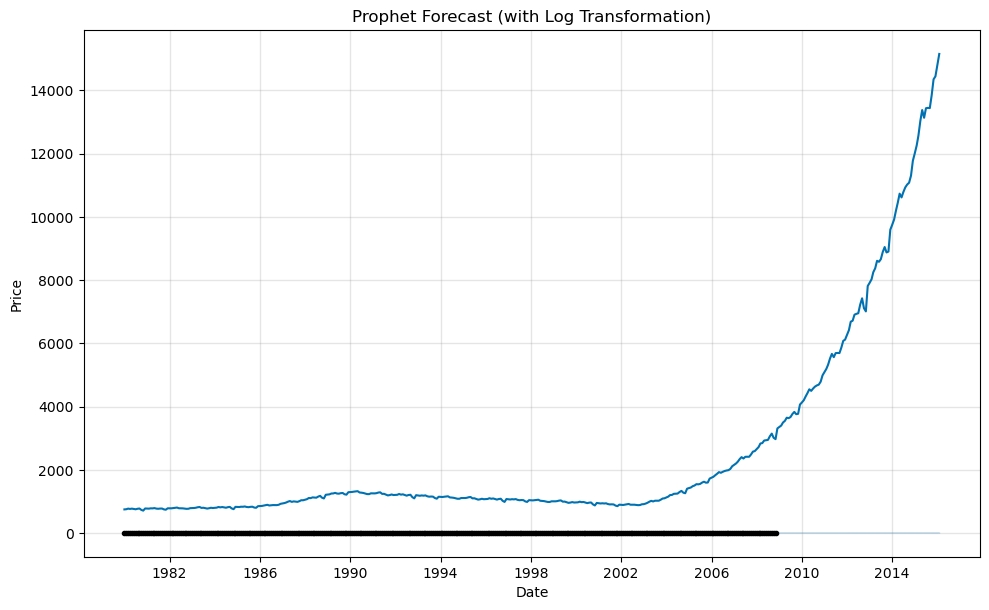

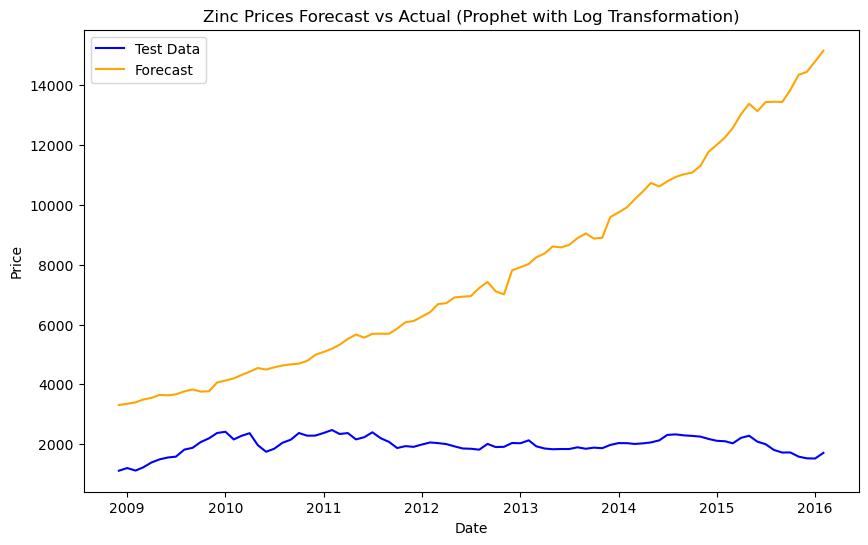

Mean Absolute Error: 5772.585636814341
Mean Squared Error: 44921398.08007171
Root Mean Squared Error: 6702.342730722722
Results saved to Prophet_Log_Transformed.csv


In [2]:
# Step 8: Evaluate Forecast Accuracy
# Extract the predicted values that correspond to the test set
y_pred = forecast['yhat'][train_size:].values
y_test = np.exp(test['y'].values)  # Inverse log transformation on y_test

# Create a dataframe with y_test and y_pred and save it as Prophet_Log_Transformed.csv
results_df = pd.DataFrame({
    'Date': test['ds'],
    'y_test': y_test,
    'y_pred': y_pred
})

# Save the DataFrame to a CSV file
results_df.to_csv('Prophet_Log_Transformed.csv', index=False)

# Step 9: Plot actual vs forecast
plt.figure(figsize=(10, 6))
plt.plot(results_df['Date'], results_df['y_test'], label='Test Data', color='blue')
plt.plot(results_df['Date'], results_df['y_pred'], label='Forecast', color='orange')
plt.title('Zinc Prices Forecast vs Actual (Prophet with Log Transformation)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 10: Evaluate Forecast Accuracy
mae = mean_absolute_error(results_df['y_test'], results_df['y_pred'])
mse = mean_squared_error(results_df['y_test'], results_df['y_pred'])
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

print("Results saved to Prophet_Log_Transformed.csv")
